<a href="https://colab.research.google.com/github/sumanyurosha/tensorflow-specialization/blob/master/Practice/Practicing_CNN_Humans_vs_Horses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Downloading the Dataset**

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-09-23 14:11:59--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.197.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  71.1MB/s    in 2.0s    

2020-09-23 14:12:01 (71.1 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2020-09-23 14:12:01--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.142.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480

In [2]:
import os
import zipfile

zip_local = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(zip_local, 'r')

zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

zip_local = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(zip_local, 'r')

zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

# **2. Verifying the dataset files**

In [4]:
train_dir = '/tmp/horse-or-human'
valid_dir = '/tmp/validation-horse-or-human'

train_horse_dir = os.path.join(train_dir, 'horses')
train_human_dir = os.path.join(train_dir, 'humans')

valid_horse_dir = os.path.join(valid_dir, 'horses')
valid_human_dir = os.path.join(valid_dir, 'humans')

train_human_fnames = os.listdir(train_human_dir)
train_horse_fnames = os.listdir(train_horse_dir)

valid_human_fnames = os.listdir(valid_human_dir)
valid_horse_fnames = os.listdir(valid_horse_dir)

print("no of training horse images : {}".format(len(train_horse_fnames)))
print("no of training human images : {}".format(len(train_human_fnames)))

print("no of validation horse images : {}".format(len(valid_horse_fnames)))
print("no of validation human images : {}".format(len(valid_human_fnames)))

no of training horse images : 500
no of training human images : 527
no of validation horse images : 128
no of validation human images : 128


# **3. Visualizing the Images in Dataset**

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

index = 0
n_rows = 4
n_cols = 4

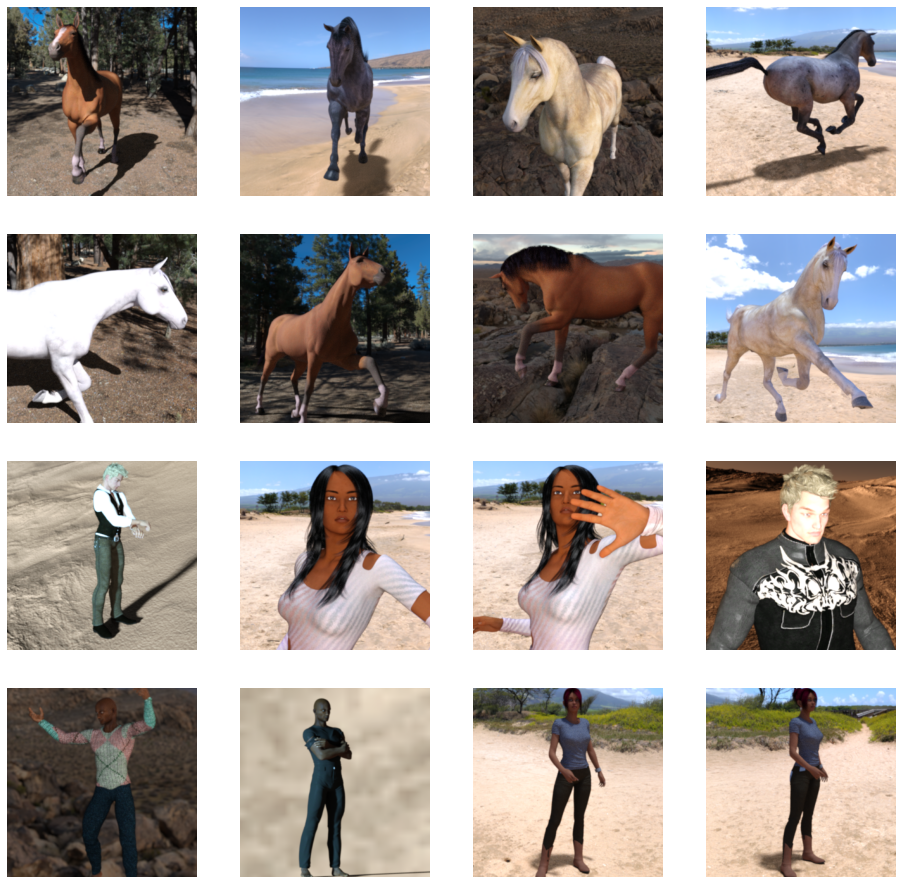

In [9]:
fig = plt.gcf()
fig.set_size_inches(n_cols*4, n_rows*4)

index += 8

horse_files = [os.path.join(train_horse_dir, fname) for fname in 
               train_horse_fnames[index-8: index]]
human_files = [os.path.join(train_human_dir, fname) for fname in 
               train_human_fnames[index-8: index]]

for i, image in enumerate(horse_files + human_files):
    sp = plt.subplot(n_rows, n_cols, i+1)
    sp.axis('off')

    img = mpimg.imread(image)
    plt.imshow(img)

plt.show()

# **4. Data Preprocessing**

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

train_dataset = train_datagen.flow_from_directory(
    train_dir,
    batch_size=32,
    target_size=(300, 300),
    class_mode='binary'
)

valid_dataset = valid_datagen.flow_from_directory(
    valid_dir,
    batch_size=32,
    target_size=(300, 300),
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


# **5. Creating a Model from Scratch**



In [13]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)       

# **6. Training the Model**

In [14]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=["accuracy"])

In [15]:
history = model.fit(train_dataset,
                    epochs=100,
                    validation_data=valid_dataset,
                    verbose=1)

Epoch 1/100
33/33 [==============================] - 8s 255ms/step - loss: 0.6911 - accuracy: 0.7050 - val_loss: 0.3901 - val_accuracy: 0.8672
Epoch 2/100
33/33 [==============================] - 8s 249ms/step - loss: 0.2330 - accuracy: 0.9163 - val_loss: 1.9374 - val_accuracy: 0.7422
Epoch 3/100
33/33 [==============================] - 8s 250ms/step - loss: 0.1322 - accuracy: 0.9523 - val_loss: 1.7753 - val_accuracy: 0.7461
Epoch 4/100
33/33 [==============================] - 8s 254ms/step - loss: 0.1997 - accuracy: 0.9464 - val_loss: 1.1819 - val_accuracy: 0.7852
Epoch 5/100
33/33 [==============================] - 8s 249ms/step - loss: 0.0713 - accuracy: 0.9766 - val_loss: 1.9503 - val_accuracy: 0.7734
Epoch 6/100
33/33 [==============================] - 8s 248ms/step - loss: 0.0516 - accuracy: 0.9864 - val_loss: 1.8094 - val_accuracy: 0.8164
Epoch 7/100
33/33 [==============================] - 8s 249ms/step - loss: 0.2390 - accuracy: 0.9649 - val_loss: 1.7281 - val_accuracy: 0.7656

# **7. Visualizing the Loss and Accuracy Curves over the training period**

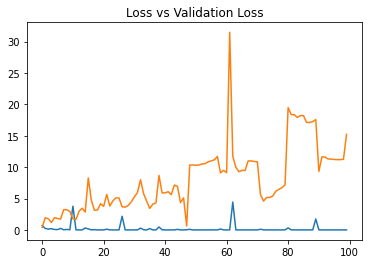

Text(0.5, 1.0, 'Accuracy vs Validation Accuracy')

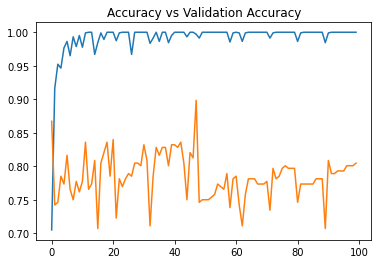

In [17]:
acc = history.history["accuracy"]
loss = history.history["loss"]

val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title("Loss vs Validation Loss")

plt.show()

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title("Accuracy vs Validation Accuracy")

# **8. Addressing Overfitting using Augmentation**

In [24]:
train_datagen = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=40,
    height_shift_range=0.2,
    width_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

train_dataset = train_datagen.flow_from_directory(
    train_dir,
    batch_size=32,
    target_size=(300, 300),
    class_mode="binary"
)

valid_datagen = ImageDataGenerator(rescale=1/255.)

valid_dataset = valid_datagen.flow_from_directory(
    valid_dir,
    batch_size=16,
    target_size=(300, 300),
    class_mode="binary"
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


# **9. Adding Dropout**

In [25]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 33, 33, 64)       

In [27]:
from keras.optimizers import RMSprop

model.compile(loss="binary_crossentropy",
              optimizer=RMSprop(lr=1e-3),
              metrics=["accuracy"])

In [28]:
history = model.fit(train_dataset,
          epochs=100,
          validation_data=valid_dataset,
          verbose=1)

Epoch 1/100
33/33 [==============================] - 27s 806ms/step - loss: 0.7815 - accuracy: 0.5258 - val_loss: 0.9923 - val_accuracy: 0.5000
Epoch 2/100
33/33 [==============================] - 26s 802ms/step - loss: 0.6631 - accuracy: 0.6349 - val_loss: 1.1799 - val_accuracy: 0.5273
Epoch 3/100
33/33 [==============================] - 26s 800ms/step - loss: 0.5727 - accuracy: 0.7098 - val_loss: 2.0114 - val_accuracy: 0.5234
Epoch 4/100
33/33 [==============================] - 26s 798ms/step - loss: 0.5339 - accuracy: 0.7722 - val_loss: 1.1484 - val_accuracy: 0.5273
Epoch 5/100
33/33 [==============================] - 26s 797ms/step - loss: 0.4597 - accuracy: 0.7770 - val_loss: 1.0269 - val_accuracy: 0.5039
Epoch 6/100
33/33 [==============================] - 26s 800ms/step - loss: 0.3742 - accuracy: 0.8228 - val_loss: 1.7955 - val_accuracy: 0.5547
Epoch 7/100
33/33 [==============================] - 26s 803ms/step - loss: 0.3555 - accuracy: 0.8539 - val_loss: 1.0665 - val_accuracy:

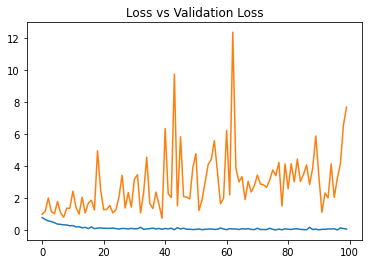

Text(0.5, 1.0, 'Accuracy vs Validation Accuracy')

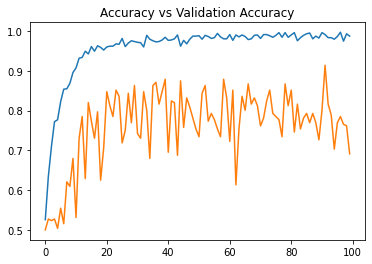

In [29]:
acc = history.history["accuracy"]
loss = history.history["loss"]

val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title("Loss vs Validation Loss")

plt.show()

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title("Accuracy vs Validation Accuracy")